In [2]:
!pip3 install GEOparse


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.5/278.5 kB 724.6 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29052 sha256=c9415d2c4ca4878f4298e229c6e6b13d96358e83964677c8b40a35e683117ac4
  Stored in directory: /Users/devansh/Library/Caches/pip/wheels/b4/27/3b/3faf8423d9c4fad02d693b4d75d1b6e82fde1d5cf59cc9a40e
Successfully built GEOparse


In [4]:
import GEOparse

# Download and parse the GEO dataset
gse = GEOparse.get_GEO(geo="GSE7390", destdir="Data")

100%|██████████████████████████████████████| 42.7M/42.7M [00:41<00:00, 1.09MB/s]


In [12]:
import GEOparse
import pandas as pd

# Load the GEO dataset
gse = GEOparse.get_GEO(filepath="Data/GSE7390_family.soft.gz", silent=True)

# Initialize dictionaries to hold sample metadata (gsms), gene expression data (genes), and platform data (gpls)
gsms = {}
genes = {}
gpls = {}

# Extract sample metadata and gene expression data
for gsm_name, gsm in gse.gsms.items():
    gsms[gsm_name] = gsm.metadata['characteristics_ch1']
    genes[gsm_name] = gsm.table

# Extract platform data
for gpl_name, gpl in gse.gpls.items():
    gpls[gpl_name] = gpl.table

# Create a DataFrame from sample metadata and gene expression data
df_list = []
for name in gsms.keys():
    d = dict(zip(genes[name]['ID_REF'], genes[name]['VALUE']))
    d.update(dict(x.split(': ', 1) for x in gsms[name] if ': ' in x))
    df_list.append(d)
df = pd.DataFrame(df_list)

# Save the cleaned data to CSV
df.to_csv("Data/cleaned_data.csv", index=False)

# Display the value counts for 'e.os'
print(df['e.os'].value_counts())

# Read the gene list from the CSV file and filter the dataset based on these genes
gene = pd.read_csv("Data/gene.csv")
relevant_genes = gene["Gene"].values

# Ensure only columns in both 'df' and 'relevant_genes' are selected, plus additional specified metadata columns
columns_to_select = ['sample_name', 'id', 'filename', 'hospital', 'age', 'size', 'Surgery_type', 'Histtype', 'Angioinv', 'Lymp_infil', 'node', 'grade', 'er', 't.rfs', 'e.rfs', 't.os', 'e.os', 't.dmfs', 'e.dmfs', 't.tdm', 'e.tdm', 'risksg', 'NPI', 'risknpi', 'AOL_os_10y', 'risk_AOL', 'veridex_risk']
columns_to_select = [col for col in columns_to_select if col in df.columns] + list(set(relevant_genes) & set(df.columns))

selected = df[columns_to_select]

# Save the filtered data to CSV
selected.to_csv("Data/selected.csv", index=False)

0    142
1     56
Name: e.os, dtype: int64


In [11]:
import os
import pandas as pd

# Directory where the file will be saved
directory = "Data"

# Check if the directory exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)

# Define a list of example genes relevant to your study
genes = ['BRCA1', 'BRCA2', 'TP53', 'HER2', 'EGFR']

# Convert the list of genes into a pandas DataFrame
gene_df = pd.DataFrame(genes, columns=['Gene'])

# Path to the gene.csv file
file_path = os.path.join(directory, "gene.csv")

# Save the DataFrame to a .csv file
gene_df.to_csv(file_path, index=False)

print(f"'gene.csv' file has been created in the '{directory}' directory.")

'gene.csv' file has been created in the 'Data' directory.


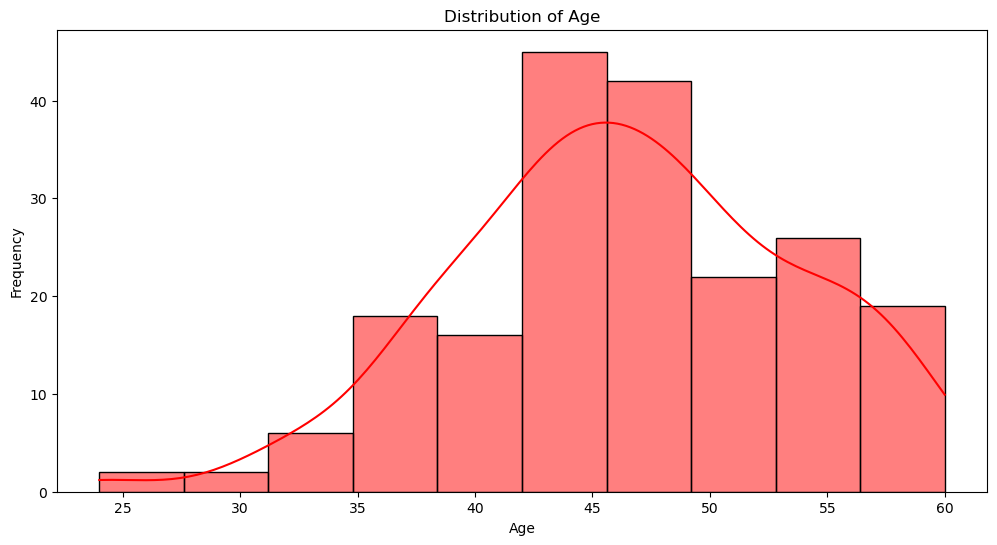

In [1]:
#Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram
data = pd.read_csv("Data/selected.csv")

plt.figure(figsize=(12, 6))
sns.histplot(data['age'], bins=10, kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

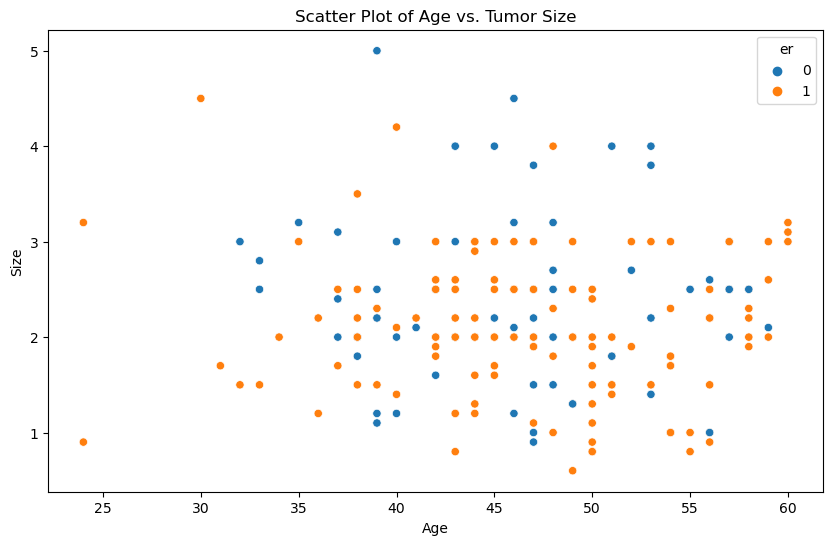

In [2]:
#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='size', data=data, hue='er')
plt.title('Scatter Plot of Age vs. Tumor Size')
plt.xlabel('Age')
plt.ylabel('Size')
plt.show()

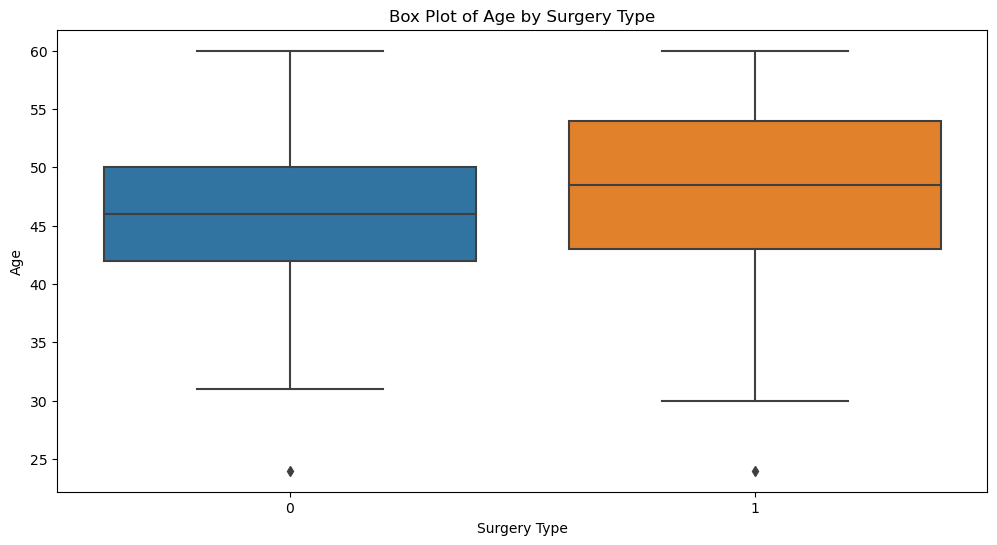

In [3]:
#Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Surgery_type', y='age', data=data)
plt.title('Box Plot of Age by Surgery Type')
plt.xlabel('Surgery Type')
plt.ylabel('Age')
plt.show()

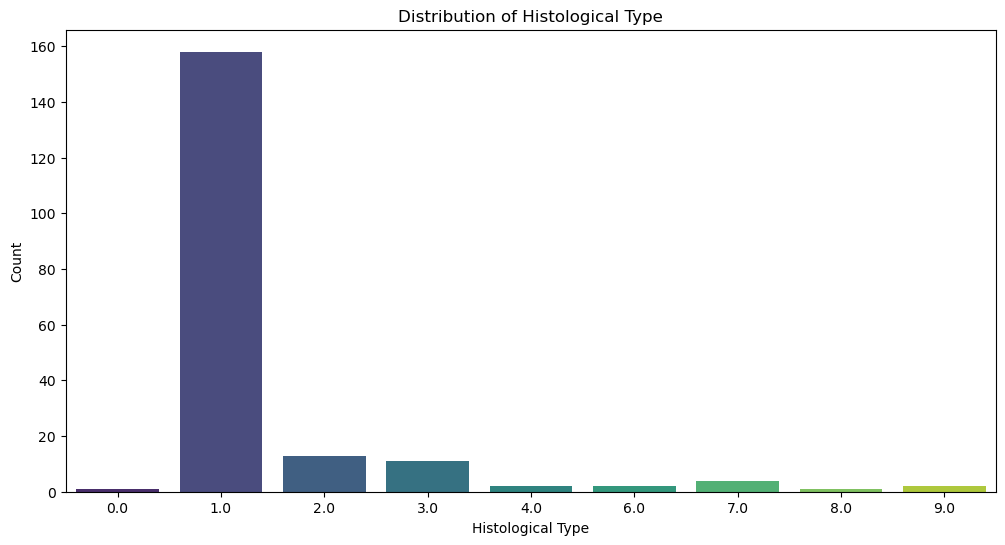

In [4]:
#Bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Histtype', data=data, palette='viridis')
plt.title('Distribution of Histological Type')
plt.xlabel('Histological Type')
plt.ylabel('Count')
plt.show()